In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Importing dataset and examining it
dataset = pd.read_csv("iris.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000    

In [3]:
# Converting Categorical features into Numerical features
converter = LabelEncoder()
dataset['Species'] = converter.fit_transform(dataset['Species'].astype(str))
print(dataset.head())
print(dataset.info())

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [4]:
# Dividing dataset into label and feature sets
X = dataset.drop('Species', axis = 1) # Features
Y = dataset['Species'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 4)
(150,)


In [5]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

Variance explained by each of the n_components:  [0.72770452 0.23030523]
Total variance explained by the n_components:  0.9580097536148198


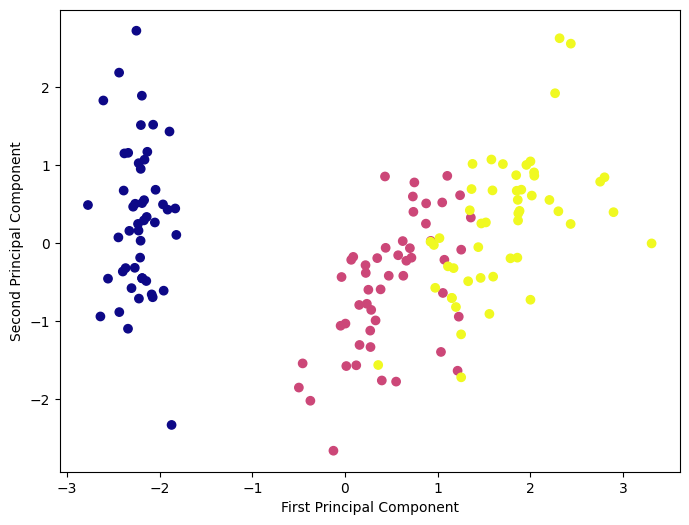

In [6]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Cluster Centers: 
 [[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


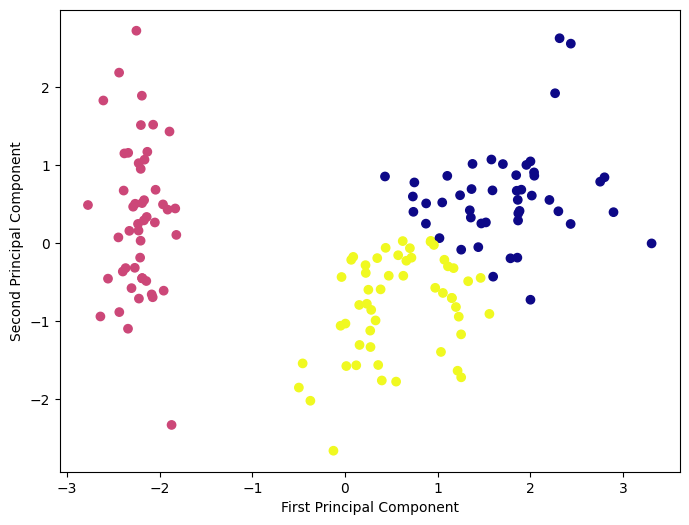

In [7]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

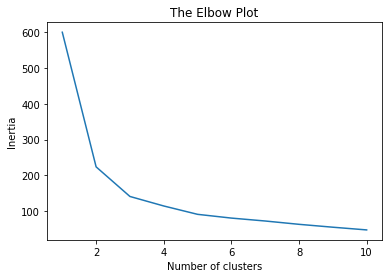

In [8]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Cluster Centers: 
 [[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]]


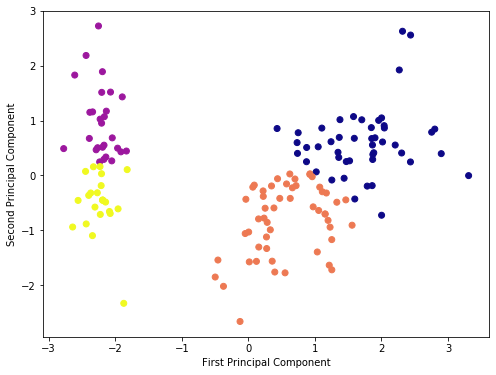

In [9]:
# If K=4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000    

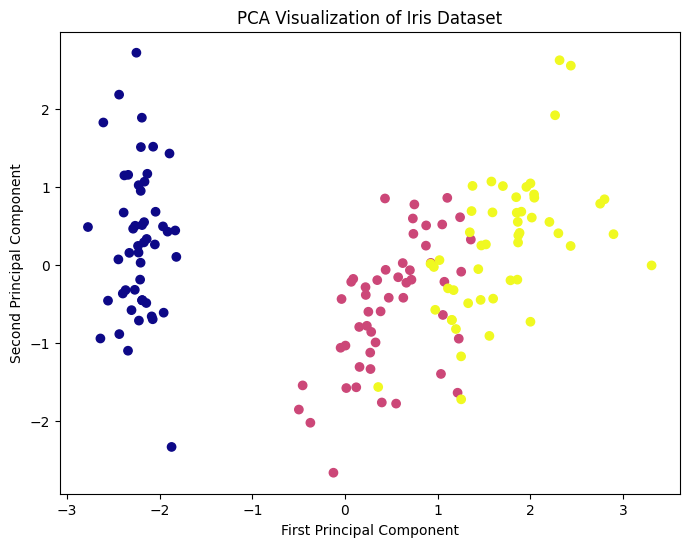

Cluster Centers: 
 [[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


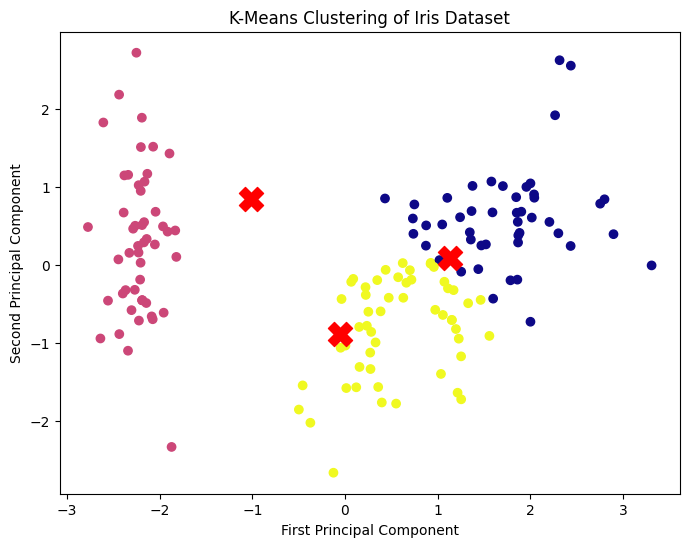

Davies-Bouldin Index: 0.8354098493935599
Silhouette Score: 0.45897178670187166
Calinski-Harabasz Index: 239.34180132491102


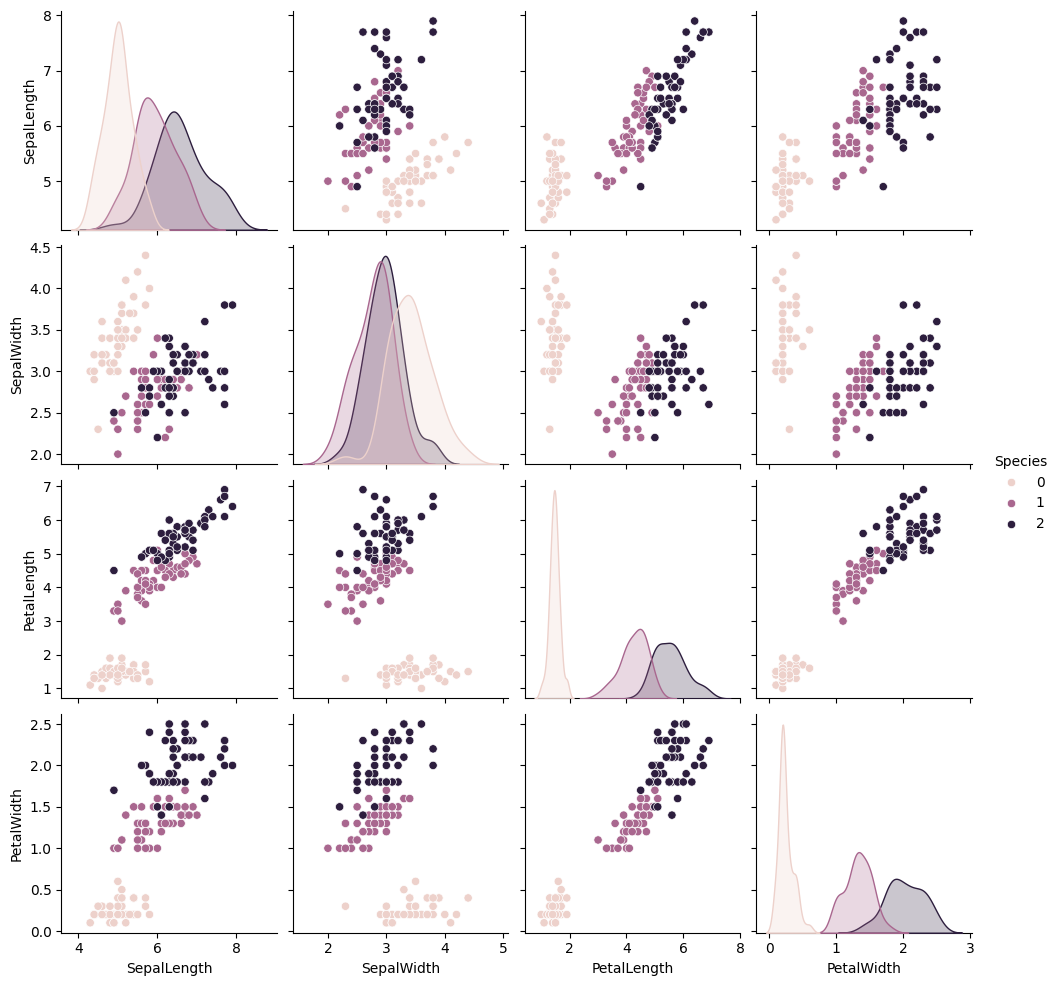

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Importing dataset and examining it
dataset = pd.read_csv("iris.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

# Converting Categorical features into Numerical features
converter = LabelEncoder()
dataset['Species'] = converter.fit_transform(dataset['Species'].astype(str))
print(dataset.head())
print(dataset.info())

# Dividing dataset into label and feature sets
X = dataset.drop('Species', axis=1) # Features
Y = dataset['Species'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Implementing PCA to visualize dataset
pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ", pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ", sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Iris Dataset')
plt.show()

# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
print("Cluster Centers: \n", kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

# Davies-Bouldin index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz index
ch_index = calinski_harabasz_score(X_scaled, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index)

# Pairwise plot
sns.pairplot(dataset, hue='Species', height=2.5)
plt.show()
